In [ ]:
# March 20 2022
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
baby_names = pd.read_csv('https://raw.githubusercontent.com/erood/interviewqs.com_code_snippets/master/Datasets/ddi_baby_names.csv')
baby_names.head()

In [ ]:
baby_names.shape

-Number of unique names across the dataset, split by both # of unique male/female names  
-Top 10 most popular male and female names, along with their associated counts  
-The top 10 most popular names from 2010+, with an associated plot to show the relative growth between names

In [ ]:
male_unique = baby_names[baby_names['gender']=='M']['name'].nunique()
female_unique = baby_names[baby_names['gender']=='F']['name'].nunique()

print(f"Number of Unique Female Names : {female_unique} \n Number of Unique Male Names : {male_unique}")

In [ ]:
males = baby_names[baby_names['gender']=='M']
females = baby_names[baby_names['gender']=='F']

In [ ]:
def get_name_count(df):
    trans = df.copy()
    trans_group = trans.groupby(['name'],as_index=False).agg('sum').sort_values('count',ascending=False).reset_index()

    return_obj = trans_group[['name','count']]

    return return_obj.head(10)

male_count = get_name_count(males)
male_count

In [ ]:
female_count = get_name_count(females)
female_count

In [ ]:
top10names = baby_names[baby_names['year']>=2010].groupby(['name'],as_index=False).agg('sum').sort_values('count',ascending=False).reset_index(drop=True)[['name','count']]
top10list = top10names['name'].head(10).values.tolist()
top10list

In [ ]:
twentyten = baby_names[(baby_names['year']>=2010) & (baby_names['name'].isin(top10list))].groupby(['name','year']).agg('sum').reset_index()
twentyten


In [ ]:
sns.set_style('dark')
sns.lineplot(data=twentyten,x='year',y='count',hue='name')
plt.title("Top 10 Baby Names Since 2010")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

## 03/22/2023

Given the following dataset, calculate the average lifetime value of a customer.

Below are a couple of definitions to help solve the problem:

Lifetime value is average revenue divided by the churn rate  
Churn rate is defined as the total number of churned customers / total number of customers  
Additionally, here is code to import the relevant packages as well as the dataset shown above, to help get you started:

In [ ]:
#Importing packages
import pandas as pd
import numpy as np

#Read in the dataset
data = pd.read_csv("https://raw.githubusercontent.com/erood/interviewqs.com_code_snippets/master/Datasets/teleco_user_data.csv") 
#Convert these column types to int
data['TotalCharges'] = pd.to_numeric(data.TotalCharges, downcast='integer', errors='coerce')
data['MonthlyCharges'] = pd.to_numeric(data.MonthlyCharges, downcast='integer', errors='coerce')

In [ ]:
data.head()

In [ ]:
churn_rate = data[data['Churn']=='Yes'].shape[0]/data.shape[0]
avg_revenue = data['TotalCharges'].mean()

print(f"Churn Rate = {round(churn_rate,3)} \nAverage Revenue = {round(avg_revenue,3)} \nTotal Lifetime Value = {round((avg_revenue/churn_rate),3)}")

03/21/2023

Suppose you're given a matrix of 1s and 0s that represents a map of rivers. You can assume that the grid cells in your map are only connected horizontally and vertically (e.g. no diagonal connections). You can assume that 1 represents water (your river) and 0 represents land/your river bank. Each cell has a length of 1 and is square in your map. Given this, write code to determine the perimeter of your river.

Input: [[1,0]]   
Output: 4

Input: [[1,0,1],  
-------[1,1,1]] 
Output: 12

In [ ]:
def find_river_perimeter(arr : list):
    perimeter = 0
    for ind,lis in enumerate(arr):
        for i,v in enumerate(lis):
            if i == 0:
                if v == 1 and perimeter == 0:
                    perimeter+= 4
            if lis[i-1] == 1 and lis[i]==1:
                perimeter+= 2
    
    return perimeter

test = find_river_perimeter([[1,0,1],[1,1,1],[1,0,0]])
print(test)

In [ ]:
def find_river_perimeter_v2(arr : list):
    

## 03/24/2023

Refer to the data table shown above, and develop a hypothesis test to compare mean hours per day spent watching TV between subjects with and without hypertension (you're testing to see if there's a significant difference in the means). Walk through what test you chose and why, run your test (feel free to use tech here, doing it by hand is not needed), and share your conclusion.

In [ ]:
def variance(sd): return round(sd**2,2)

data_points = {"population" : {"sd" : 1.8, "mean" : 3.1}
               ,"hypertension tv" : {"sd" : 1.8,"mean" : 3.6}
               ,"nohyper tv" : {"sd" : 1.7, "mean" : 2.8}}

for i,v in data_points.items():
    v['var'] = variance(v['sd'])

data_points

Since the sample's are both above 30, we will need to use a z-test, we already know the variance, mean and std of each test group, as well as the number of samples

## 03/31/2023 Create a model to predict bicycle ridership

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import date
df = pd.read_csv('https://raw.githubusercontent.com/erood/interviewqs.com_code_snippets/master/Datasets/nyc_east_river_bicycle_counts.csv')
df.head()

,Unnamed: 0,Date,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,0,2016-04-01 00:00:00,2016-04-01 00:00:00,78.1,66.0,0.01,1704.0,3126,4115.0,2552.0,11497
1,1,2016-04-02 00:00:00,2016-04-02 00:00:00,55.0,48.9,0.15,827.0,1646,2565.0,1884.0,6922
2,2,2016-04-03 00:00:00,2016-04-03 00:00:00,39.9,34.0,0.09,526.0,1232,1695.0,1306.0,4759
3,3,2016-04-04 00:00:00,2016-04-04 00:00:00,44.1,33.1,0.47,521.0,1067,1440.0,1307.0,4335
4,4,2016-04-05 00:00:00,2016-04-05 00:00:00,42.1,26.1,0,1416.0,2617,3081.0,2357.0,9471


In [2]:
df.dtypes

Unnamed: 0               int64
Date                    object
Day                     object
High Temp (°F)         float64
Low Temp (°F)          float64
Precipitation           object
Brooklyn Bridge        float64
Manhattan Bridge         int64
Williamsburg Bridge    float64
Queensboro Bridge      float64
Total                    int64
dtype: object

In [3]:
#df['Precipitation'] = df['Precipitation'].astype('float')
df['Manhattan Bridge'] = df['Manhattan Bridge'].astype('float')
df['Total'] = df['Total'].astype('float')

In [4]:
df['DOW_int'] = df['Day'].apply(lambda x : pd.Timestamp(x).dayofweek)
df['DOW_obj'] = df['Day'].apply(lambda x : pd.Timestamp(x).day_name())
df['Month'] = df['Day'].apply(lambda x : pd.Timestamp(x).month)

In [5]:
df.head()

,Unnamed: 0,Date,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total,DOW_int,DOW_obj,Month
0,0,2016-04-01 00:00:00,2016-04-01 00:00:00,78.1,66.0,0.01,1704.0,3126.0,4115.0,2552.0,11497.0,4,Friday,4
1,1,2016-04-02 00:00:00,2016-04-02 00:00:00,55.0,48.9,0.15,827.0,1646.0,2565.0,1884.0,6922.0,5,Saturday,4
2,2,2016-04-03 00:00:00,2016-04-03 00:00:00,39.9,34.0,0.09,526.0,1232.0,1695.0,1306.0,4759.0,6,Sunday,4
3,3,2016-04-04 00:00:00,2016-04-04 00:00:00,44.1,33.1,0.47,521.0,1067.0,1440.0,1307.0,4335.0,0,Monday,4
4,4,2016-04-05 00:00:00,2016-04-05 00:00:00,42.1,26.1,0,1416.0,2617.0,3081.0,2357.0,9471.0,1,Tuesday,4


In [6]:
df.isna().sum()

Unnamed: 0             0
Date                   0
Day                    0
High Temp (°F)         0
Low Temp (°F)          0
Precipitation          0
Brooklyn Bridge        0
Manhattan Bridge       0
Williamsburg Bridge    0
Queensboro Bridge      0
Total                  0
DOW_int                0
DOW_obj                0
Month                  0
dtype: int64

In [7]:
df['Weekday'] = np.where(df['DOW_int']<5,1,0)
df.head()

,Unnamed: 0,Date,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total,DOW_int,DOW_obj,Month,Weekday
0,0,2016-04-01 00:00:00,2016-04-01 00:00:00,78.1,66.0,0.01,1704.0,3126.0,4115.0,2552.0,11497.0,4,Friday,4,1
1,1,2016-04-02 00:00:00,2016-04-02 00:00:00,55.0,48.9,0.15,827.0,1646.0,2565.0,1884.0,6922.0,5,Saturday,4,0
2,2,2016-04-03 00:00:00,2016-04-03 00:00:00,39.9,34.0,0.09,526.0,1232.0,1695.0,1306.0,4759.0,6,Sunday,4,0
3,3,2016-04-04 00:00:00,2016-04-04 00:00:00,44.1,33.1,0.47,521.0,1067.0,1440.0,1307.0,4335.0,0,Monday,4,1
4,4,2016-04-05 00:00:00,2016-04-05 00:00:00,42.1,26.1,0,1416.0,2617.0,3081.0,2357.0,9471.0,1,Tuesday,4,1


In [8]:
df.shape

(210, 15)

In [9]:
df[df['Precipitation'] =='T'] = 0.61
df['Precipitation'] = df['Precipitation'].astype('float')

<AxesSubplot: >

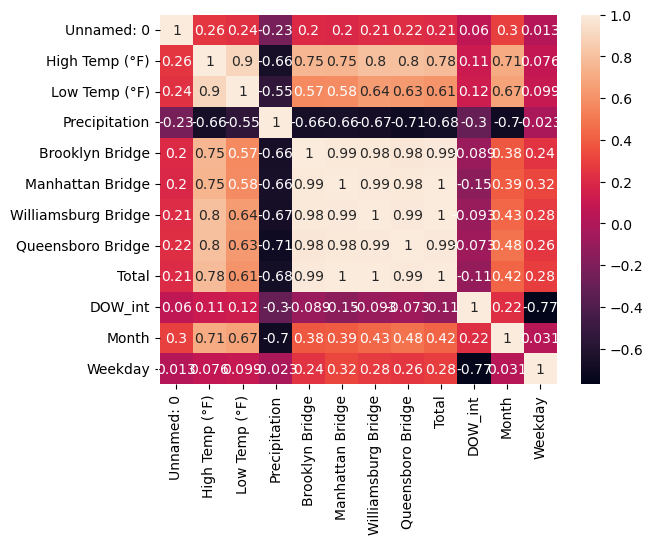

In [10]:
corr = df.corr()
sns.heatmap(corr,annot=True)

In [11]:
df.columns

Index(['Unnamed: 0', 'Date', 'Day', 'High Temp (°F)', 'Low Temp (°F)',
       'Precipitation', 'Brooklyn Bridge', 'Manhattan Bridge',
       'Williamsburg Bridge', 'Queensboro Bridge', 'Total', 'DOW_int',
       'DOW_obj', 'Month', 'Weekday'],
      dtype='object')

In [1]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
features_and_labels = ['High Temp (°F)','Precipitation','Month','Weekday','Brooklyn Bridge','Manhattan Bridge','Williamsburg Bridge','Queensboro Bridge']

test,train = train_test_split(df[features_and_labels], test_size=0.2,random_state=42)

In [ ]:
def preprocess_input(data):
    Brooklyn = data.pop('Brooklyn Bridge')
    bnp = np.array(Brooklyn)
    Manhattan = data.pop('Manhattan Bridge')
    mnp = np.array(Manhattan)
    WilliamsBurg = data.pop('Williamsburg Bridge')
    wnp = np.array(WilliamsBurg)
    Queensboro = data.pop('Queensboro Bridge')
    qnp = np.array(Queensboro)

    return (bnp,mnp,wnp,qnp)

In [ ]:
y_train = preprocess_input(train)
y_test = preprocess_input(test)

In [ ]:
tf.random.set_seed(42)
model1 = tf.keras.Sequential([
                             tf.keras.layers.Dense(10)
                             tf.keras.layers.Dense(1)
])
model1.compile( loss = tf.keras.losses.mae, #mae stands for mean absolute error
              optimizer = tf.keras.optimizers.SGD(), #stochastic GD
              metrics = ['mae'])

model1.fit(train,y_train,epochs=50)
preds1 = model1.predict(test)

In [ ]:
y_train

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(train['Precipitation'],y_train[0], c="b", label="Training data")
plt.scatter(test['Precipitation'],y_test[0], c="g", label="Testing data")
plt.scatter(test['Precipitation'],preds1, c="r", label="Predictions")
plt.legend()

In [ ]:
def compile_model(model,input):
    x = model(input)

In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)

normalizer.adapt(np.array(train_features))

## 04-02-2023

Suppose we are given an array of n integers which represent the value of some stock over time. Assuming you are allowed to buy the stock exactly once and sell the stock once, what is the maximum profit you can make? Can you write an algorithm that takes in an array of values and returns the maximum profit? The maximum profit you can make is 24 because you would buy the stock when its price is 1 and sell when it's 25. Note that we cannot make 25, because the stock is priced at 0 after it is priced at 25 (e.g you can't sell before you buy).  
Two requirements:  
sell-buy must be the maximum value
sell index must be greater than buy index

In [5]:
arr = [2, 7, 1, 8, 2, 8, 14, 25, 14, 0, 4, 5]

def find_max_profit(arr):
    max_profit = 0
    for i,v in enumerate(arr):
        for y in arr[i:]:
            if y-v > max_profit:
                max_profit = y-v


    return max_profit

find_max_profit(arr)

24

## 04-03-2023

In [ ]:
query = """select company_code as Company_Code
        , chief_executive_officer as CEO
        , sum(distinct vice_president) VPs
        , sum(distinct director) Directors
        , sum(distinct manager) Managers
        , sum(distinct individual_contributor)
        from allCompanyEmployees
        group by company_code, chief_executive_officer"""

In [12]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/erood/interviewqs.com_code_snippets/master/Datasets/ddi_message_app_data.csv")
df

,date,sender_id,receiver_id
0,2018-03-01,5,2
1,2018-03-01,8,6
2,2018-03-01,1,2
3,2018-03-01,4,8
4,2018-03-01,2,7
...,...,...,...
994,2018-03-03,7,1
995,2018-03-03,3,9
996,2018-03-03,6,8
997,2018-03-03,10,6


In [33]:
dfgroup = df.groupby('sender_id').agg(set)
total = dfgroup.shape[0]
criteria = len([i for i  in dfgroup['receiver_id'] if len(i) == 9])

print((criteria/total)*100)

100.0


## 04/07/2023

Given the following dataset, can you write a SQL query that returns the top 3 performing ad groups each day?

Here we'll define performance as the ratio between revenue and spend (e.g. revenue / spend). In other words, the higher the ratio the better the peformance. The output of the query will be the date and an array of the ad groups.

In [4]:
import pandas as pd
rev = pd.read_csv('04072023rev.csv')
spend = pd.read_csv('04072023spend.csv')

In [5]:
rev.head()

,date,shown,clicked,converted,avg_cost_per_click,total_revenue,ad
0,10/1/15,65877,2339,43,0.90,641.62,ad_group_1
1,10/2/15,65100,2498,38,0.94,756.37,ad_group_1
2,10/3/15,70658,2313,49,0.86,970.90,ad_group_1
3,10/4/15,69809,2833,51,1.01,907.39,ad_group_1
4,10/5/15,68186,2696,41,1.00,879.45,ad_group_1


In [6]:
spend.head()

,date,ad,total_spend
0,10/1/15,ad_group_1,2105.10
1,10/2/15,ad_group_1,2348.12
2,10/3/15,ad_group_1,1989.18
3,10/4/15,ad_group_1,2861.33
4,10/5/15,ad_group_1,2696.00


In [10]:
rev['ad'].nunique()

40

In [11]:
rev['date'].nunique()

53

In [12]:
ques = rev.merge(spend, how='inner', on=['date','ad'])

In [21]:
ques['Performance_Ratio'] = round(ques['total_revenue']/ques['total_spend'],2)

best_ad_group = ques[['ad','Performance_Ratio']].groupby('ad').mean()
best_ad_group.sort_values('Performance_Ratio',ascending=False)

,Performance_Ratio
ad,
ad_group_31,8.846792
ad_group_2,2.506981
ad_group_16,2.448235
ad_group_14,1.853846
ad_group_27,1.254717
ad_group_36,0.929245
ad_group_15,0.907925
ad_group_22,0.891132
ad_group_13,0.876471


In [40]:
def find_performance_by_date(ques_df):
    ques_df['Performance_Ratio'] = round(ques_df['total_revenue']/ques_df['total_spend'],2)

    return ques_df[['date','ad','Performance_Ratio']].groupby(by=['date','ad']).sum()


date_df = find_performance_by_date(ques)

date_df['date'] = '10/1/15'

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

## 04-13-2023  
More specifically, can you create histograms for purchase value, time between sign up and purchase time, and age -- with fraud/non-fraud differentiated on the same chart?

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Interview04132023.csv')
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,is_fraud
0,22058,2015-02-24 22:55:49,2015-04-18 2:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 1:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 7:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [62]:
df.dtypes

user_id             int64
signup_time        object
purchase_time      object
purchase_value      int64
device_id          object
source             object
browser            object
sex                object
age                 int64
ip_address        float64
is_fraud            int64
dtype: object

In [63]:
df.shape

(61096, 11)

<AxesSubplot: xlabel='purchase_value', ylabel='Count'>

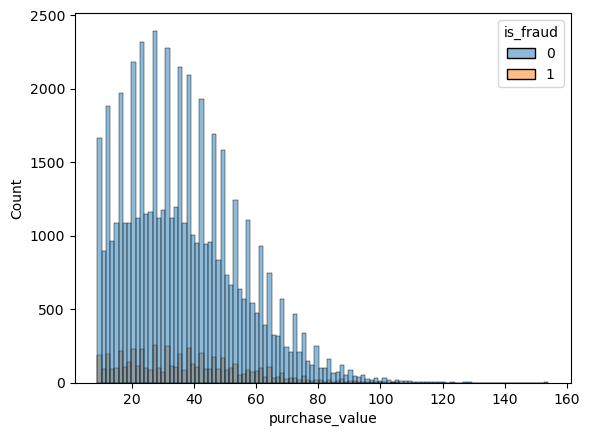

In [64]:
sns.histplot(data=df,x = 'purchase_value',hue='is_fraud')

In [74]:
df['time_between_signup_and_purchase'] = df.apply(lambda x : pd.to_datetime(x['purchase_time']) - pd.to_datetime(x['signup_time']),axis=1)

df['days_between'] = df['time_between_signup_and_purchase'].apply(lambda x : x.days)
df['hours_between'] = df['time_between_signup_and_purchase'].apply(lambda x : (x.days*24) + x.seconds//3600)

In [75]:
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,is_fraud,time_between_signup_and_purchase,days_between,hours_between
0,22058,2015-02-24 22:55:49,2015-04-18 2:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,52 days 03:51:22,52,1251
1,333320,2015-06-07 20:39:50,2015-06-08 1:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,0 days 04:59:04,0,4
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,0 days 00:00:01,0,0
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,5 days 16:41:25,5,136
4,221365,2015-07-21 7:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,50 days 11:31:01,50,1211


In [31]:
df.dtypes

user_id                                       int64
signup_time                                  object
purchase_time                                object
purchase_value                                int64
device_id                                    object
source                                       object
browser                                      object
sex                                          object
age                                           int64
ip_address                                  float64
is_fraud                                      int64
time_between_signup_and_purchase    timedelta64[ns]
dtype: object

<AxesSubplot: xlabel='hours_between', ylabel='Count'>

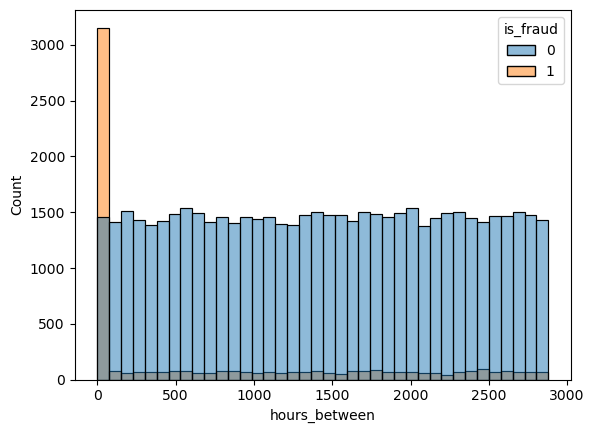

In [76]:
sns.histplot(data=df,x ='hours_between',hue='is_fraud')

<AxesSubplot: xlabel='age', ylabel='Count'>

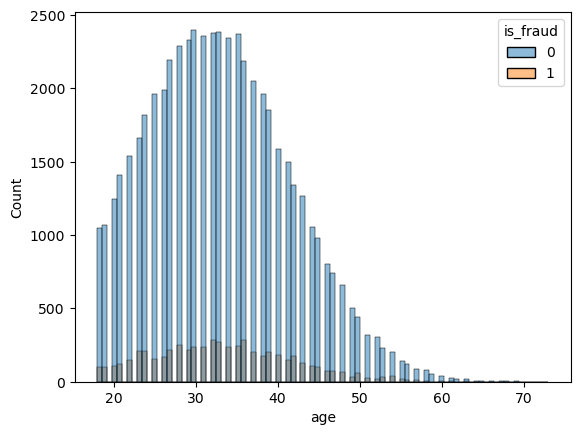

In [77]:
sns.histplot(data=df,x='age',hue='is_fraud')

## 04/18/2023

Given an array of integers and a number X, can you find the smallest subarray with sum greater than the given value? If there isn't a possible subarray, print "Not possible".

In [11]:
def greater_subarray(arr,x):
    subarrs = []
    for i in range(len(arr)+1):
        for j in range(i):
            subarrs.append(arr[j:i])
    subarrs.sort(key = lambda x : len(x))

    for sub in subarrs:
        if sum(sub) > x:
            return sub
    
    return "Not possible"

In [12]:
test1 = [1, 4, 45, 6, 0, 19]
test1x = 51
result = [4, 45, 6]

test2 = [1, 10, 5, 2, 7]
test2x = 9
result = [10]

greater_subarray(test1,test1x)

[4, 45, 6]

In [13]:
greater_subarray(test2,test2x)

[10]

## 4/26/2023
Can you write a SQL query to summarize the BroadBeanOrigin for US manufactured chocolate bars and provide the number of reviews, average rating, and average cocoa percent?

In [15]:
import pandas as pd
import pandasql as ps
import sqlite3 as sq
cacao = pd.read_csv('flavors_of_cacao.csv')

cacao.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [17]:
new_columns = [i.replace(' ','').replace('\n','') for i in cacao.columns.tolist()]
cacao.columns = new_columns

cacao['CocoaPercent'] = cacao['CocoaPercent'].apply(lambda x : float(x.replace('%',''))/100)

In [13]:
sq.Connection('cacao.db')

In [19]:
conn = sq.connect('cacao.db')
conn.execute('Create table if not exists BBO_reviews (BroadBeanOrigin text,Rating float,CocaPercent float)')

cacao.to_sql('BBO_reviews',conn,if_exists='replace',index=False)
conn.commit()

In [24]:
query = "select BroadBeanOrigin, count(*) NumberOfReviews, round(avg(Rating),2) AverageRating, round(avg(CocoaPercent),2) AverageCocoaPercent from BBO_reviews group by BroadBeanOrigin"

aggregate = pd.read_sql(query,conn)

,BroadBeanOrigin,NumberOfReviews,AverageRating,AverageCocoaPercent
0,None,1,2.50,0.72
1,"Africa, Carribean, C. Am.",1,2.75,0.74
2,Australia,3,3.25,0.69
3,Belize,49,3.23,0.73
4,Bolivia,57,3.20,0.72
...,...,...,...,...
96,"Venezuela, Trinidad",1,2.50,0.62
97,Venezuela/ Ghana,1,3.50,0.85
98,Vietnam,38,3.32,0.74
99,West Africa,6,2.58,0.73


## 04/27/2023
Given an integer matrix, m, with an odd # dimensions, n x n, (e.g 3 x 3, 5 x 5, etc), find the sum of middle row as well as the middle column.  
#Your program would output:  
'Sum middle row =' 15 #(e.g. 4+5+6)  
'Sum middle column =' 15 #(e.g. 2+5+8)

In [6]:
test_case = [[1,2,3,5],
[4,5,6,5],
[7,8,9,5],
[1,1,1,1]]

def middle_sums(mat):
    if len(mat)%2 == 0 or len(mat[0])%2 == 0:
        return "This is not an odd square matrix, please input a matrix with odd dimensions e.g. 3x3, 5x5"
    else:
        middle_index = int((len(mat)-1)/2)
        middle_row = sum(mat[middle_index])
        middle_column = 0
        for i in mat:
            middle_column+=i[middle_index]

        return print(f'Sum Middle row = {middle_row} \nSum Middle Column = {middle_column}')
    
middle_sums(test_case)

'This is not an odd matrix, please input a matrix with odd dimensions e.g. 3x3, 5x5'